# 1. Install Dependencies and Setup

In [1]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow opencv-python matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/cd/28/d60804f272dfe07c7e5334899abb6af61f6c7f3f7e68c1faf96780988b50/tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/36/98/fab8d982e2e2b57bdebcad64c7e5b5a14ac91c657cac509b9cf3fbea49d2/opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/07/76/fde990f131450f08eb06e50814b98d347b14d7916c0ec31cba0a65a9be2b/matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/94/b4/f9fe2805899492ec3a38e6846ebe6a402a398e892d573af29f45c6a2a838/tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/dd/87/de5c32fa1b1c6c3305d576e299801d8655c175ca9557019906247b994331/absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/pa

In [4]:
!pip list

Package                      Version
---------------------------- --------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.40.0
gast                         0.4.0
google-auth                  2.21.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.56.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.23.3
ipython                      8.14.0
jax                          0.4.13
jedi 

In [5]:
import tensorflow as tf
import os

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'data' 

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

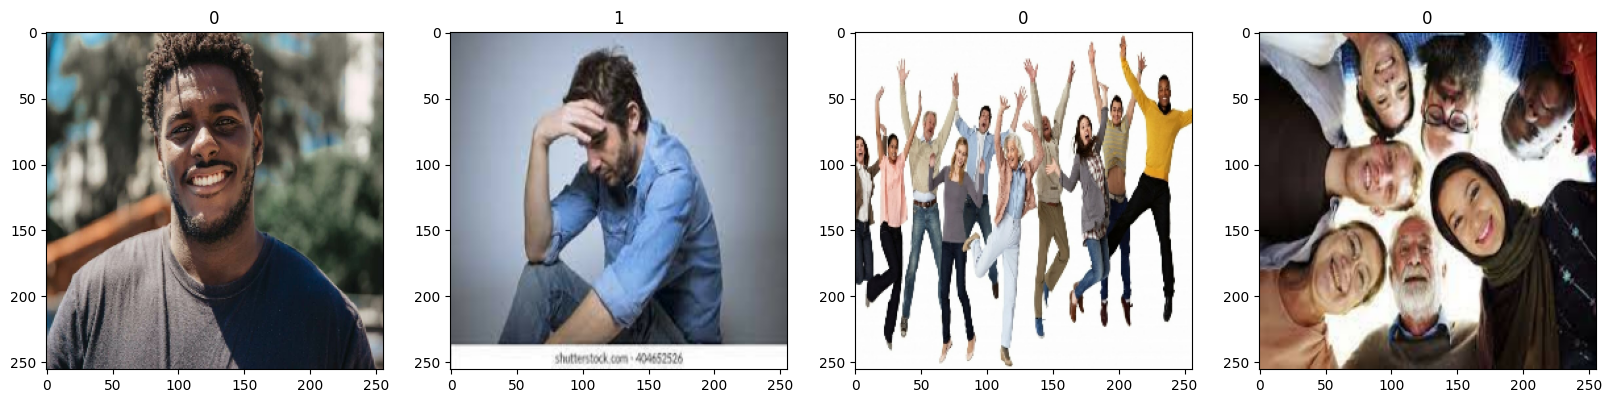

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 4.90196079e-01, 8.47058833e-01],
          [0.00000000e+00, 4.90632653e-01, 8.47495377e-01],
          [0.00000000e+00, 4.94117647e-01, 8.50980401e-01],
          ...,
          [0.00000000e+00, 4.86274511e-01, 8.39215696e-01],
          [0.00000000e+00, 4.89759505e-01, 8.32245708e-01],
          [0.00000000e+00, 4.90196079e-01, 8.31372559e-01]],
 
         [[0.00000000e+00, 4.90196079e-01, 8.47058833e-01],
          [0.00000000e+00, 4.90632653e-01, 8.47495377e-01],
          [0.00000000e+00, 4.94117647e-01, 8.50980401e-01],
          ...,
          [0.00000000e+00, 4.86274511e-01, 8.40048492e-01],
          [0.00000000e+00, 4.89759505e-01, 8.32245708e-01],
          [0.00000000e+00, 4.90196079e-01, 8.31372559e-01]],
 
         [[0.00000000e+00, 4.91322011e-01, 8.48184764e-01],
          [0.00000000e+00, 4.91633207e-01, 8.48495960e-01],
          [0.00000000e+00, 4.94326532e-01, 8.51189315e-01],
          ...,
          [0.00000000e+00, 4.87400442e-01, 8.4179

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

7

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 684ms/step - loss: 1.1361 - accuracy: 0.5089 - val_loss: 0.7429 - val_accuracy: 0.4375
Epoch 2/20
7/7 [==============================] - 6s 777ms/step - loss: 0.6756 - accuracy: 0.5848 - val_loss: 0.6068 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 6s 793ms/step - loss: 0.5913 - accuracy: 0.7455 - val_loss: 0.5367 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 5s 623ms/step - loss: 0.4680 - accuracy: 0.7946 - val_loss: 0.3579 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 7s 966ms/step - loss: 0.3955 - accuracy: 0.8393 - val_loss: 0.4370 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 5s 624ms/step - loss: 0.2552 - accuracy: 0.9107 - val_loss: 0.2394 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 6s 835ms/step - loss: 0.2062 - accuracy: 0.9375 - val_loss: 0.1368 - val_accuracy: 0.9688
Epoch 8/20
7/7 [====

# 8. Plot Performance

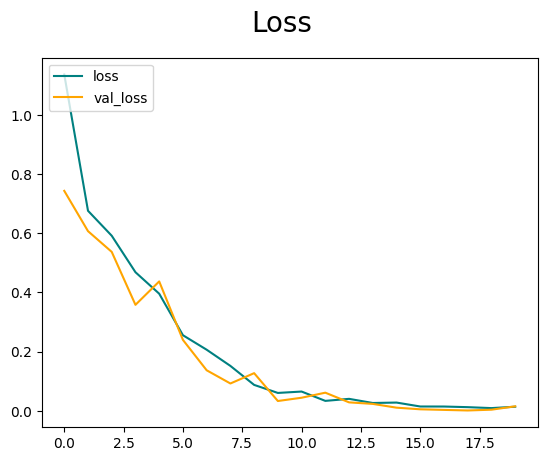

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

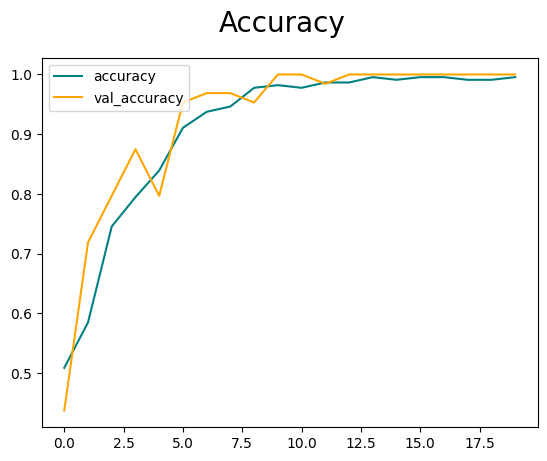

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 274ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [37]:
import cv2

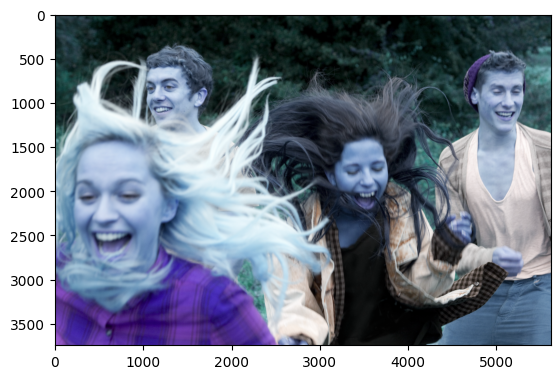

In [38]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

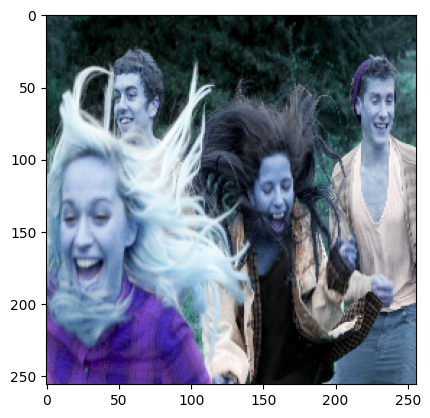

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [41]:
yhat

array([[1.8687248e-05]], dtype=float32)

In [42]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('./models/imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 122ms/step


array([[1.8687248e-05]], dtype=float32)